# Computational Methods in Physics (FIS810)
# UFPE - PPGFIS
## Week 6 - Monte Carlo

In [71]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from scipy.special import gamma

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

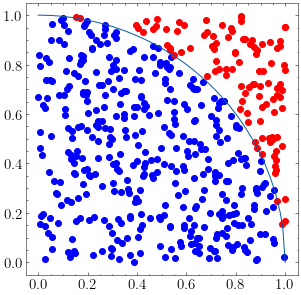

In [72]:
# Finding the area of a circle (and pi)

N = 500 # Number of trials
Ns = 0  # Sum of the trials inside the circle 

for i in range(N):
    x, y = np.random.random(2)
    if (x**2 + y**2) < 1.0: # Check if the random (x,y) is inside the circle
        plt.scatter(x, y, c='b')
        Ns += 1
    else:
        plt.scatter(x, y, c='r')
        
dx = 0.01
x = np.arange(0, 1.0+dx, dx)
plt.plot(x, np.sqrt(1-x**2))
plt.axis('scaled')
plt.show()

In [73]:
I = 4*(Ns/N) # Multiplying by 4 because we only calculated one quadrant
print(f"A = {I}")

A = 3.16


In [74]:
# Generalizing for N dim hypersphere

def hypersphere_volume(d, r=1):
    """Exact volume of a hypersphere of d dimension."""
    return (2*(np.pi**(d/2))*(r**d))/(gamma(d/2)*d)
    
    
N = 1000
d = 3

Ns = 0
for i in range(N):
    if np.sum(np.random.random(d)**2) < 1.0:
        Ns +=1

V = (2**d)*Ns/N
V_ex = hypersphere_volume(d)

print(f"Numerical volume: {V}")
print(f"Exact volume: {V_ex}")

Numerical volume: 4.264
Exact volume: 4.188790204786391


In [75]:
# Checking for different d

d_list = np.arange(2,8)

def monte_carlo_hypersphere(d, N=1000):
    Ns = 0
    for i in range(N):
        if np.sum(np.random.random(d)**2) < 1.0:
            Ns +=1
    V = (2**d)*Ns/N
    return V

V_mc = np.array([monte_carlo_hypersphere(d, N=1000) for d in d_list])
V_ex = np.array([np.round(hypersphere_volume(d), 3) for d in d_list])
dV = np.abs(V_mc - V_ex)


print(f"d = {d_list}")
print(f"V_mc = {V_mc}")
print(f"V_ex = {V_ex}")
print(f"dV   = {dV}")

d = [2 3 4 5 6 7]
V_mc = [3.164 4.296 5.072 4.64  5.888 5.376]
V_ex = [3.142 4.189 4.935 5.264 5.168 4.725]
dV   = [0.022 0.107 0.137 0.624 0.72  0.651]


In [76]:
# Checking for different N

N_values = [100, 1000, 10000, 1000000]
V_mc_N = np.array([[monte_carlo_hypersphere(d, N) for d in d_list] for N in N_values])
dV = np.abs(V_mc_N - V_ex)

In [77]:
print(V_mc_N)

[[2.92     4.24     5.12     5.12     2.56     3.84    ]
 [3.084    4.256    4.848    4.832    4.928    4.608   ]
 [3.1432   4.156    5.0288   5.1392   4.9472   5.44    ]
 [3.142184 4.183344 4.926144 5.267296 5.17984  4.748672]]


In [78]:
print(dV)

[[2.2200e-01 5.1000e-02 1.8500e-01 1.4400e-01 2.6080e+00 8.8500e-01]
 [5.8000e-02 6.7000e-02 8.7000e-02 4.3200e-01 2.4000e-01 1.1700e-01]
 [1.2000e-03 3.3000e-02 9.3800e-02 1.2480e-01 2.2080e-01 7.1500e-01]
 [1.8400e-04 5.6560e-03 8.8560e-03 3.2960e-03 1.1840e-02 2.3672e-02]]


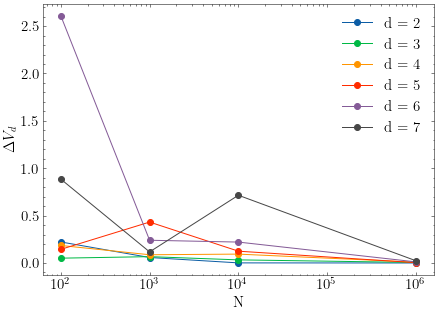

In [100]:
for d in range(6):
    plt.plot(N_values, dV[:,d], marker='o', label=f"d = {d+2}")

plt.xscale('log')
plt.xlabel('N')
plt.ylabel('$\Delta V_{d}$')
plt.legend()
plt.show()

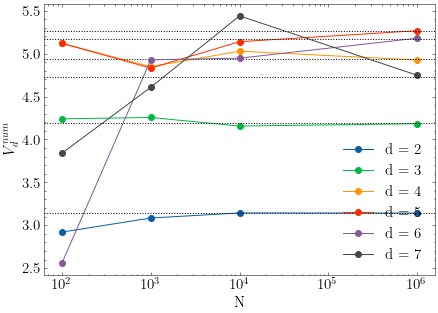

In [110]:
for d in range(6):
    plt.plot(N_values, V_mc_N[:,d], marker='o', label=f"d = {d+2}")
    plt.axhline(V_ex[d], ls=':', c='k')

plt.xscale('log')
plt.xlabel('N')
plt.ylabel('$V^{num}_{d}$')
plt.legend()
plt.show()

In [126]:
V_mc = np.array([monte_carlo_hypersphere(d, N=1000000) for d in d_list])
dV = np.abs(V_mc - V_ex)

In [130]:
print(V_mc)

[3.141244 4.186776 4.941248 5.275456 5.156032 4.694784]


In [131]:
print(dV)

[0.000756 0.002224 0.006248 0.011456 0.011968 0.030216]


In [139]:
print((dV/V_mc)*100)

[0.0240669  0.05311963 0.12644579 0.21715658 0.23211648 0.64360788]


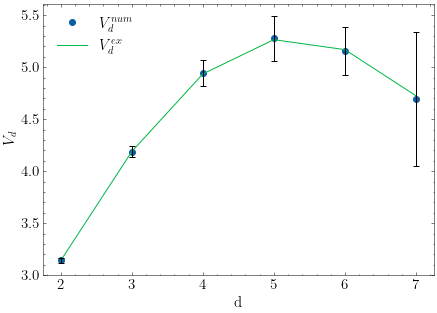

In [146]:
plt.plot(d_list, V_mc, marker='o', ls='', label='$V^{num}_{d}$')
plt.plot(d_list, V_ex, label='$V^{ex}_{d}$')
plt.errorbar(d_list, V_mc, yerr=(dV/V_mc)*100, fmt=' ', ecolor='k', capsize=3)
plt.xlabel('d')
plt.ylabel('$V_{d}$')
plt.legend()
plt.show()